
---

# 💔 What is a **Loss Function**? (For a 5-Year-Old Brainiac)

---

## 🧸 1. Simple Definition

A **loss function** tells the neural network:

> “Hey buddy, you made a mistake. Here’s *how bad* it was.”

💥 It’s like giving the network a **scorecard** showing how **wrong** it was when guessing something.

---

## 🍦 2. Real-Life Analogy: Ice Cream Guessing Game 🍨

Let’s say you're playing a game:

* Your friend hides your favorite **ice cream flavor** (e.g., Chocolate 🍫).
* You guess: **Vanilla 🍦**
* Your friend says: “Nope! That’s wrong!”
* Then he gives you a number: **"You were 80% wrong."**

That number is the **loss**.

> 🧠 Loss is a number that says:
> “How far off was the network’s guess from the truth?”

---

## 🔍 3. Why Do We Need Loss?

Because neural networks **learn by making mistakes**!

### The process:

1. **Guess something** (Prediction)
2. **Compare with the truth** (Label)
3. **Measure how wrong** (Loss Function)
4. **Fix itself** (Backpropagation)

---

## 🧠 4. Where Loss Function Happens

```
         📥 Input Data
              ↓
         🧠 Neural Network
              ↓
       🔮 Predicted Answer (ŷ)
              ↓
    🎯 Compare with Real Answer (y)
              ↓
  💔 Calculate Loss = Loss(ŷ, y)
              ↓
       🛠️ Update weights to improve
```

---

## 🔢 5. Common Types of Loss Functions

| Type                          | Used For                     | Meaning                         |
| ----------------------------- | ---------------------------- | ------------------------------- |
| **Mean Squared Error (MSE)**  | Regression (predict numbers) | “How far is my number?”         |
| **Binary Cross Entropy**      | 0/1 classification           | “Did I guess yes/no correctly?” |
| **Categorical Cross Entropy** | Multi-class (cat/dog)        | “Did I guess the right label?”  |

---

### 🧮 Example: MSE (Mean Squared Error)

If real answer = 10
And prediction = 8
Then:

```
Loss = (10 - 8)² = 4
```

Now network says:

> “Oh no! I was off by 4. I need to do better next time!”

---

### 🧠 Example: Binary Cross Entropy

Real: Cat = 1
Predicted: 0.3
Then:

```
Loss = -log(0.3) = 1.204
```

(That means the network was pretty wrong 😢)

---

## 🛠️ 6. What Happens Next?

Once the loss is calculated:

* It’s sent **backward** through the network
* The network adjusts its **weights** using a tool called **Gradient Descent** (we’ll explain that soon!)
* Over time, the network becomes **smarter** and **makes better predictions**

---

## 📊 Summary Table

| Step                      | What Happens                         |
| ------------------------- | ------------------------------------ |
| Prediction                | The network guesses something        |
| Compare with the truth    | Real answer is checked               |
| Loss Function             | Calculates “how wrong” the guess was |
| Backpropagation           | Teaches the network to improve       |
| Lower loss = Better model | Less wrong guesses = Smarter AI      |

---

## 🎯 TL;DR

> A **loss function** is like a **teacher’s red pen** 🖍️
> It says: “You were THIS wrong”
> The smaller the number, the better your AI is doing! 🎉

---


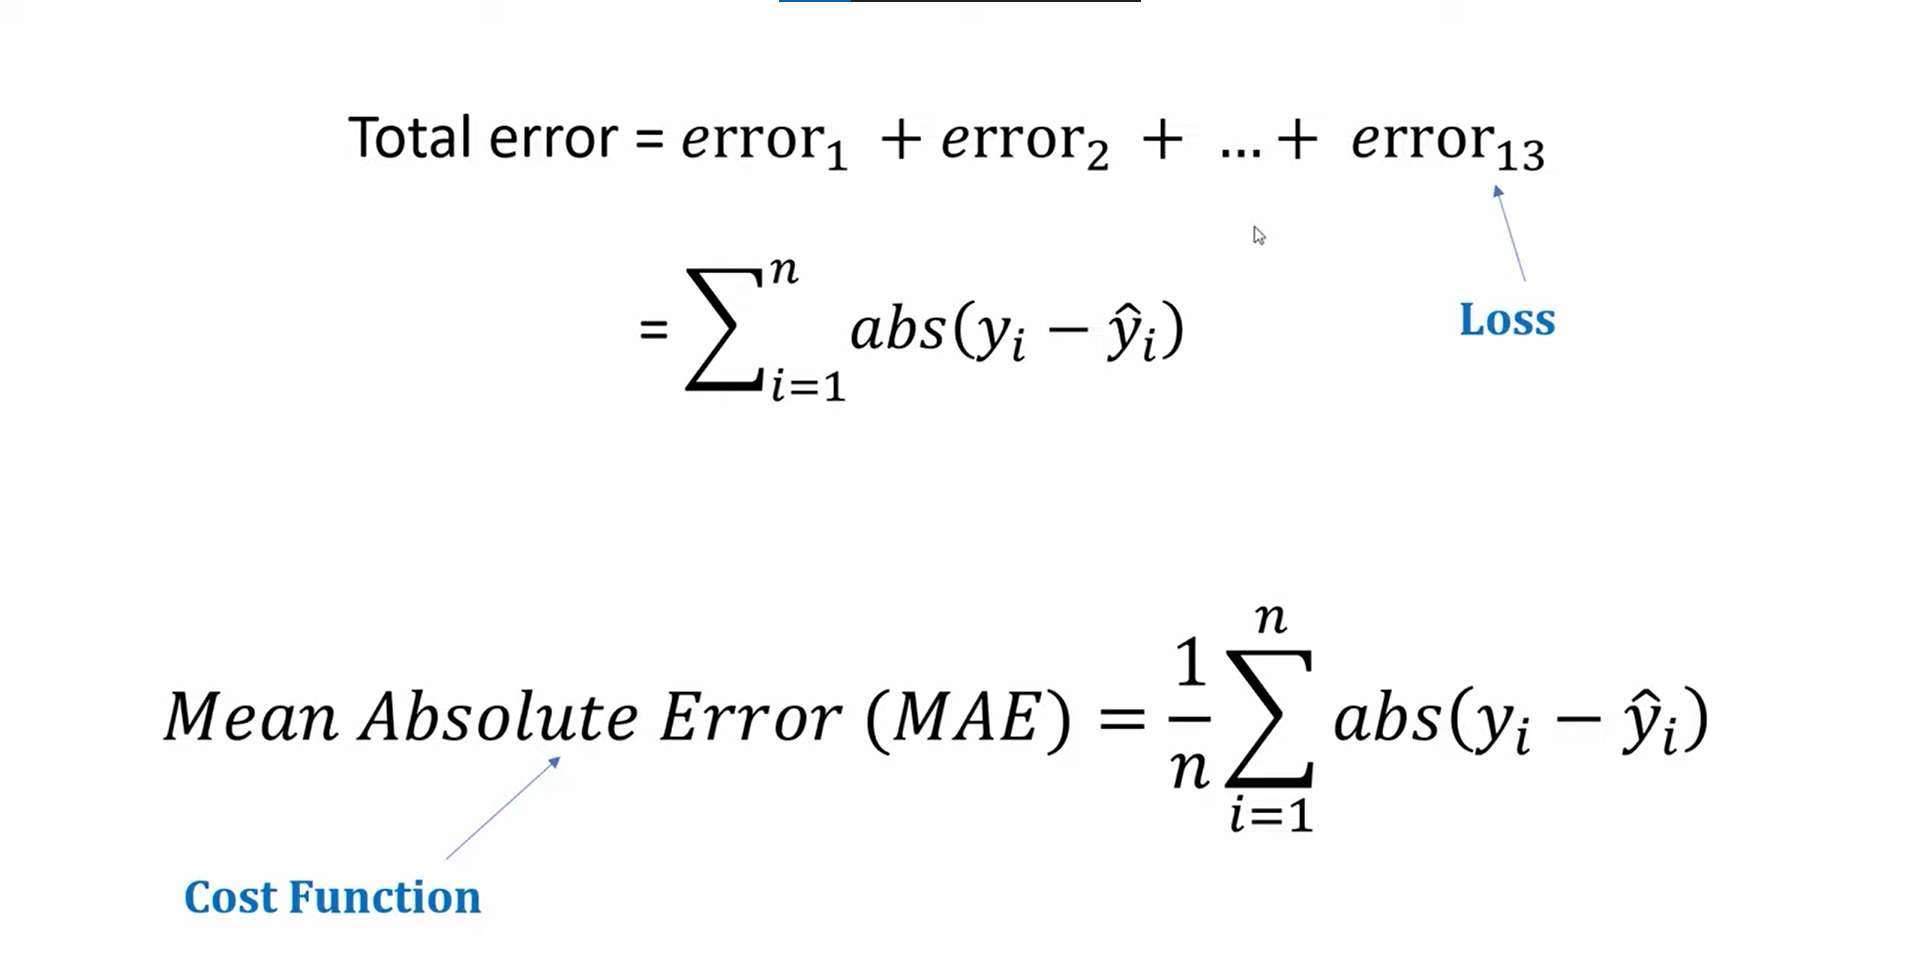
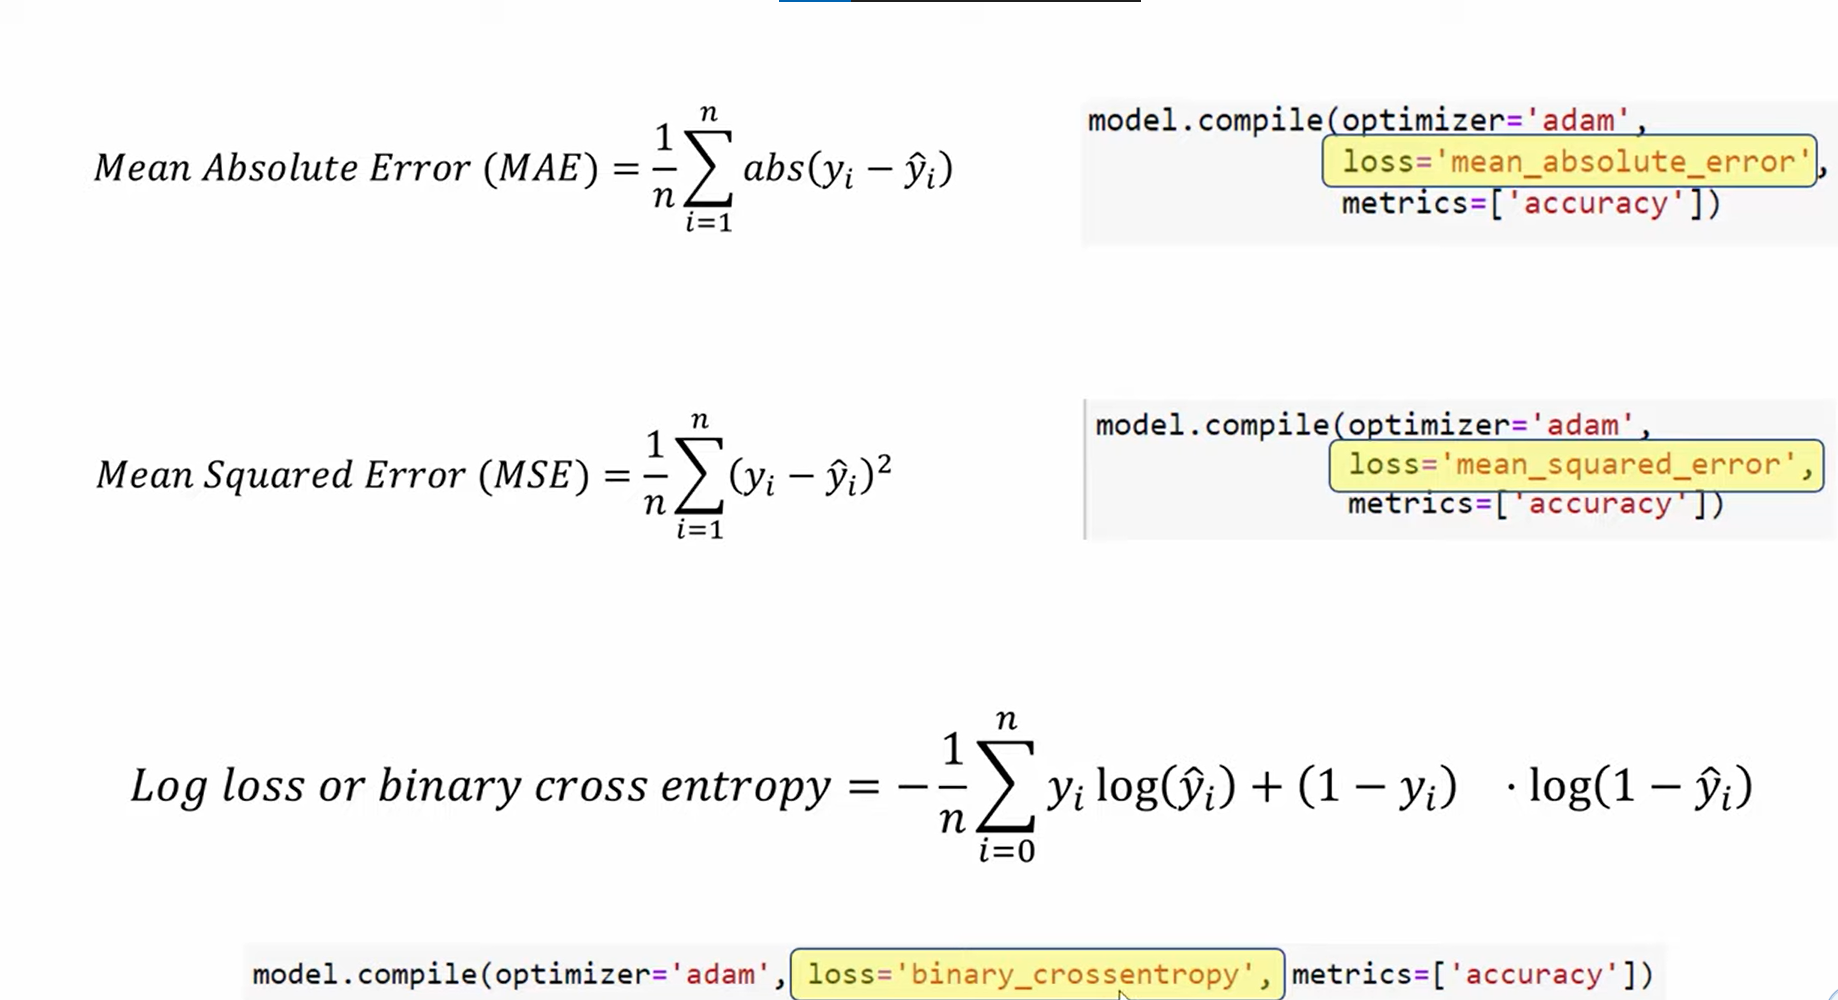

**In logistic regression we use log loss**

In [1]:
import numpy as np

In [2]:
y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

In [ ]:
def mae(y_true,y_predicted):
    total_error = 0
    for yt,yp in zip(y_true,y_predicted):
        total_error += abs(yt-yp)
    print("Total Error:", total_error)
    mae = total_error / len(y_true)
    print("MAE:",mae)
    return mae


In [12]:
mae(y_true,y_predicted)

Total Error: 2.5


0.5

### You can also do this with numpy

In [14]:
y_predicted - y_true # This will give you the real diffrence

array([ 0.7,  0.3, -1. ,  0. ,  0.5])

In [15]:
np.abs(y_predicted - y_true) # This will give you the absolute difference

array([0.7, 0.3, 1. , 0. , 0.5])

In [16]:
np.mean(np.abs(y_predicted - y_true)) # This will give you the mean absolute error

0.5

In [19]:
epsilon = 1e-15
epsilon

1e-15

In [21]:
np.log([0]) # Here the log of zero is undefined, leading to a warning or error so in order to use log loss we need to take care of this

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_1780\745886969.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0]) # Here the log of zero is undefined, leading to a warning or error so in order to use log loss we need to take care of this


array([-inf])

In [23]:
np.log([0.00000000000000000001]) # This is a very small number close to zero, which avoids the log of zero issue

array([-46.05170186])

In [25]:
y_predicted_new = [max(i,epsilon) for i in y_predicted]
y_predicted_new # Now all values are clipped to be at least epsilon

[1, 1, 1e-15, 1e-15, 1]

In [26]:
y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
y_predicted_new # Now all values are clipped to be at most 1-epsilon

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [27]:
y_predicted_new = np.array(y_predicted_new)
y_predicted_new

array([1.e+00, 1.e+00, 1.e-15, 1.e-15, 1.e+00])

In [28]:
np.log(y_predicted_new)

array([-9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16])

In [30]:
np.log(y_predicted) # This will still give you the log of the original predictions, which may include zeros

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_1780\1556514518.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(y_predicted) # This will still give you the log of the original predictions, which may include zeros


array([  0.,   0., -inf, -inf,   0.])

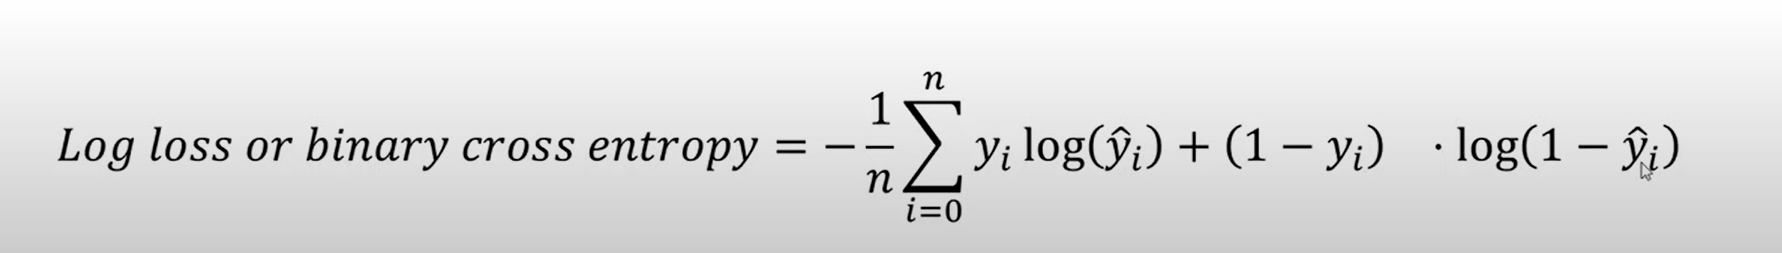

In [32]:
-np.mean(y_true * np.log(y_predicted_new) + (1 - y_true) * np.log(1 - y_predicted_new))

17.2696280766844

**Now we'll make a function of same work**

In [35]:
def log_loss(y_true,y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    log_loss_value = -np.mean(y_true * np.log(y_predicted_new) + (1 - y_true) * np.log(1 - y_predicted_new))
    return log_loss_value

In [36]:
log_loss(y_true,y_predicted)

17.269388197455342

# **Exercise** Implement mean squared error (or MSE) in two ways,
1) Without using numpy (i.e. using plain python)
2) With the use of numpy

In [38]:
def mse(y_true,y_predicted):
    total_error = 0
    for yt,yp in zip(y_true,y_predicted):
        total_error += (yt-yp)**2
    print("Total Error:", total_error)
    mse = total_error / len(y_true)
    print("MSE:",mse)
    return mse


In [39]:
mse(y_true,y_predicted)

Total Error: 1.83
MSE: 0.366


0.366

In [41]:
np.mean(np.square(y_predicted - y_true))

0.366